In [1]:
import numpy as np
import pandas as pd

In [2]:

# Read the dataset
df = pd.read_csv('FertilizerData.csv')  # Replace 'your_dataset.csv' with the actual filename

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


Shape of the dataset: (1007, 10)

First few rows of the dataset:
   Temparature  Humidity  Moisture           pH Soil Type  Crop Type  \
0           26        52      38.0  5.223054705     Sandy      Maize   
1           29        52      45.0  5.604641439     Loamy  Sugarcane   
2           34        65      62.0  6.879774358     Black     Cotton   
3           32        62      34.0  7.409914087       Red    Tobacco   
4           28        54      46.0  5.217221004    Clayey      Paddy   

   Nitrogen  Potassium Phosphorous Fertilizer Name  
0        37          0           0            Urea  
1        12          0          36             DAP  
2         7          9          30        14-35-14  
3        22          0          20           28-28  
4        35          0           0            Urea  


/tmp/ipykernel_189191/3738868512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Temparature', y='Soil Type', inner='stick', palette='Dark2')


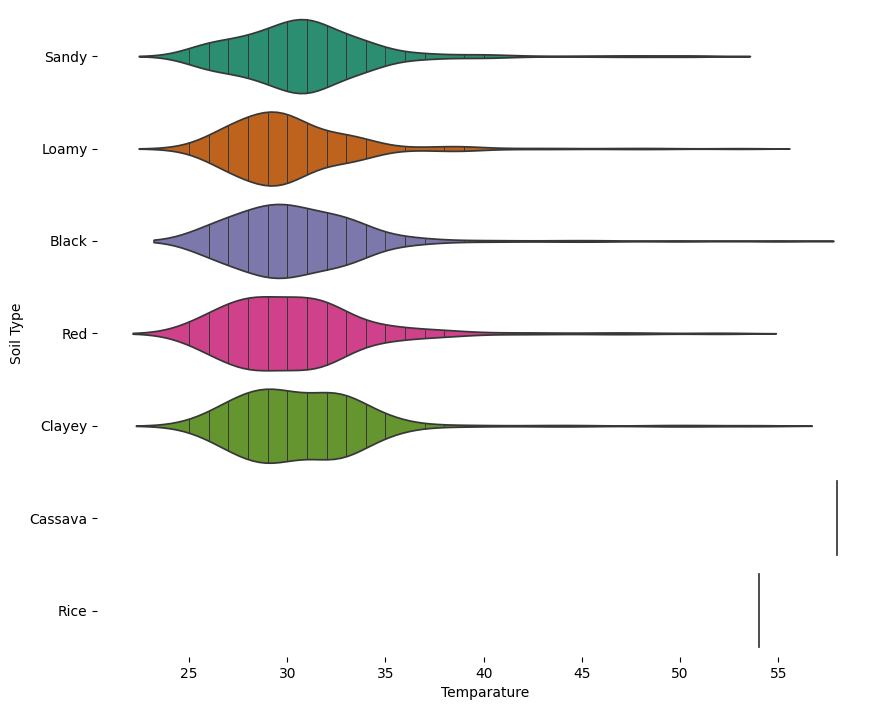

In [3]:
# @title Soil Type vs Temparature

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (10, 1.2 * len(df['Soil Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Temparature', y='Soil Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

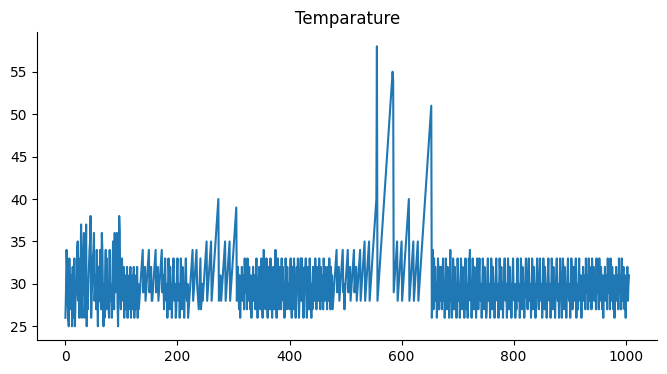

In [4]:
# @title Temparature

from matplotlib import pyplot as plt
df['Temparature'].plot(kind='line', figsize=(8, 4), title='Temparature')
plt.gca().spines[['top', 'right']].set_visible(False)

# DATA PREPROCESSING


CLEANING EMPTY CELLS

In [5]:
new_df = df.dropna()

print(new_df.to_string())

      Temparature  Humidity  Moisture           pH Soil Type    Crop Type  Nitrogen  Potassium Phosphorous Fertilizer Name
0              26        52      38.0  5.223054705     Sandy        Maize        37          0           0            Urea
1              29        52      45.0  5.604641439     Loamy    Sugarcane        12          0          36             DAP
2              34        65      62.0  6.879774358     Black       Cotton         7          9          30        14-35-14
3              32        62      34.0  7.409914087       Red      Tobacco        22          0          20           28-28
4              28        54      46.0  5.217221004    Clayey        Paddy        35          0           0            Urea
5              26        52      35.0  5.856242465     Sandy       Barley        12         10          13        17-17-17
6              25        50      64.0  5.305077634       Red       Cotton         9          0          10           20-20
7              3

In [6]:

# Assuming new_df is your DataFrame after dropping rows with missing values
new_df = new_df.copy()  # Make a copy to avoid the SettingWithCopyWarning

# Convert 'pH' column to float type
new_df.loc[:, 'pH'] = new_df['pH'].astype(float)

# Truncate 'pH' values to one decimal place
new_df.loc[:, 'pH'] = (new_df['pH'] * 10).astype(int) / 10  

# Print the resulting DataFrame
print(new_df.to_string())

      Temparature  Humidity  Moisture   pH Soil Type    Crop Type  Nitrogen  Potassium Phosphorous Fertilizer Name
0              26        52      38.0  5.2     Sandy        Maize        37          0           0            Urea
1              29        52      45.0  5.6     Loamy    Sugarcane        12          0          36             DAP
2              34        65      62.0  6.8     Black       Cotton         7          9          30        14-35-14
3              32        62      34.0  7.4       Red      Tobacco        22          0          20           28-28
4              28        54      46.0  5.2    Clayey        Paddy        35          0           0            Urea
5              26        52      35.0  5.8     Sandy       Barley        12         10          13        17-17-17
6              25        50      64.0  5.3       Red       Cotton         9          0          10           20-20
7              33        64      50.0  5.2     Loamy        Wheat        41     

* CHECK DUPLICATES

In [7]:
print(new_df.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
1002     True
1003     True
1004     True
1005     True
1006     True
Length: 1001, dtype: bool


In [8]:
new_df.drop_duplicates(inplace = True)


In [9]:

# Print the resulting DataFrame
print(new_df.to_string())

     Temparature  Humidity  Moisture   pH Soil Type    Crop Type  Nitrogen  Potassium Phosphorous Fertilizer Name
0             26        52      38.0  5.2     Sandy        Maize        37          0           0            Urea
1             29        52      45.0  5.6     Loamy    Sugarcane        12          0          36             DAP
2             34        65      62.0  6.8     Black       Cotton         7          9          30        14-35-14
3             32        62      34.0  7.4       Red      Tobacco        22          0          20           28-28
4             28        54      46.0  5.2    Clayey        Paddy        35          0           0            Urea
5             26        52      35.0  5.8     Sandy       Barley        12         10          13        17-17-17
6             25        50      64.0  5.3       Red       Cotton         9          0          10           20-20
7             33        64      50.0  5.2     Loamy        Wheat        41          0   

In [10]:
new_df.shape


(686, 10)

In [11]:
# Assuming 'y' is your target variable DataFrame containing the 'Fertilizer Name' column
new_df['Fertilizer Name'] = new_df['Fertilizer Name'].replace('regenarate', 'DAP')

# Print the updated target variable DataFrame
print(new_df.to_string())


     Temparature  Humidity  Moisture   pH Soil Type    Crop Type  Nitrogen  Potassium Phosphorous Fertilizer Name
0             26        52      38.0  5.2     Sandy        Maize        37          0           0            Urea
1             29        52      45.0  5.6     Loamy    Sugarcane        12          0          36             DAP
2             34        65      62.0  6.8     Black       Cotton         7          9          30        14-35-14
3             32        62      34.0  7.4       Red      Tobacco        22          0          20           28-28
4             28        54      46.0  5.2    Clayey        Paddy        35          0           0            Urea
5             26        52      35.0  5.8     Sandy       Barley        12         10          13        17-17-17
6             25        50      64.0  5.3       Red       Cotton         9          0          10           20-20
7             33        64      50.0  5.2     Loamy        Wheat        41          0   

<Axes: xlabel='Fertilizer Name', ylabel='count'>

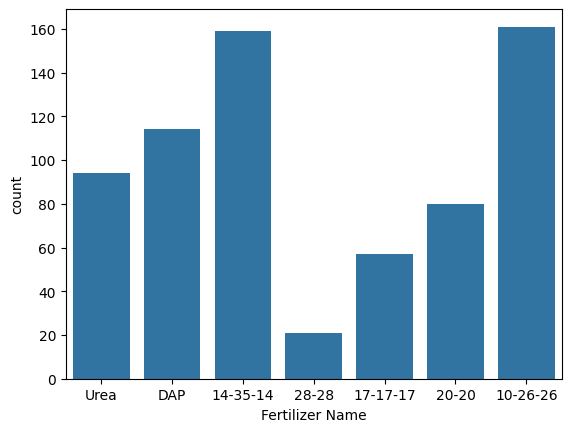

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=new_df,x='Fertilizer Name')

* ENCODING

In [13]:
new_df['Soil Type'].value_counts()


Soil Type
Sandy     165
Loamy     147
Clayey    138
Black     120
Red       116
Name: count, dtype: int64

In [14]:
new_df['Crop Type'].value_counts()


Crop Type
Wheat          73
Rice           61
Pulses         58
Barley         58
Sugarcane      57
Ground Nuts    51
Maize          46
Millets        45
Potatoes       40
Tomatoes       37
Beans          36
Oil Seeds      34
Cassava        32
Bananas        22
Cotton         12
Paddy          10
Oil seeds       7
Tobacco         7
Name: count, dtype: int64

In [15]:
soil_dict = {
    'Loamy': 1,
    'Sandy': 2,
    'Clayey': 3,
    'Black': 4,
    'Red': 5
}

crop_dict = {
    'Wheat': 1,
    'Rice': 2,
    'Pulses': 3,
    'Barley': 4,
    'Sugarcane': 5,
    'Ground Nuts': 6,
    'Maize': 7,
    'Millets': 8,
    'Potatoes': 9,
    'Tomatoes': 10,
    'Beans': 11,
    'Oil Seeds': 12,
    'Cassava': 13,
    'Bananas': 14,
    'Cotton': 15,
    'Paddy': 16,
    'Tobacco': 18
}

In [16]:
new_df['Soil_Num']=new_df['Soil Type'].map(soil_dict)
new_df['Crop_Num']=new_df['Crop Type'].map(crop_dict)

In [17]:
new_df=new_df.drop(['Soil Type','Crop Type'],axis=1)
new_df.head()

,Temparature,Humidity,Moisture,pH,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil_Num,Crop_Num
0,26,52,38.0,5.2,37,0,0,Urea,2,7.0
1,29,52,45.0,5.6,12,0,36,DAP,1,5.0
2,34,65,62.0,6.8,7,9,30,14-35-14,4,15.0
3,32,62,34.0,7.4,22,0,20,28-28,5,18.0
4,28,54,46.0,5.2,35,0,0,Urea,3,16.0


* MODEL

In [18]:
X=new_df.drop(['Fertilizer Name'],axis=1)
Y=new_df['Fertilizer Name']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [20]:
X_train.shape


(548, 9)

In [21]:
X_test.shape


(138, 9)

The Accuracy of Random Forest is  0.9130434782608695
Confusion Matrix for Random Forest:
[[34  3  0  0  0  1  0]
 [ 1 33  0  2  0  0  0]
 [ 0  1 11  1  0  1  0]
 [ 1  1  0  8  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0 18]]


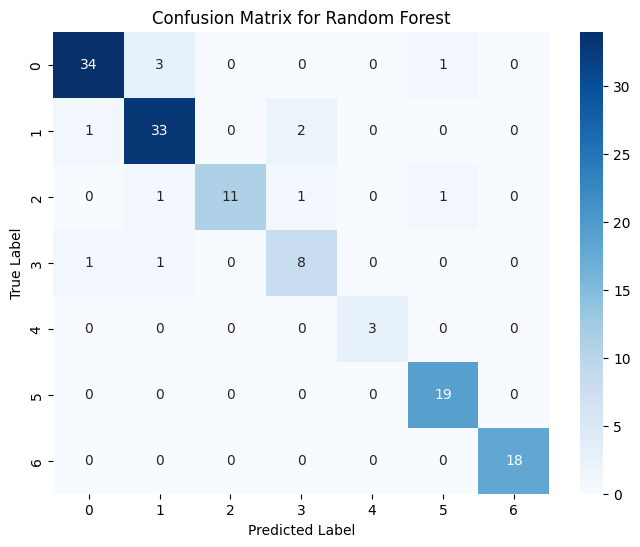

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define your X_train, X_test, Y_train, Y_test variables here

model = {
    'Random Forest': RandomForestClassifier(),
}

for name, md in model.items():
    md.fit(X_train, Y_train)
    y_pred = md.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"The Accuracy of {name} is ", accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # Plot confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [38]:
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)
accuracy_score(Y_test,ypred)


0.9130434782608695

In [34]:
import numpy as np

def recommendation(Temperature, Humidity, Moisture, pH, Nitrogen, Potassium, Phosphorous, Soil, Crop):
    # Mapping dictionaries for Soil and Crop types
    soil_dict = {
        'loamy': 1,
        'sandy': 2,
        'clayey': 3,
        'black': 4,
        'red': 5
    }

    crop_dict = {
        'sugarcane': 1,
        'cotton': 2,
        'millets': 3,
        'paddy': 4,
        'pulses': 5,
        'wheat': 6,
        'tobacco': 7,
        'barley': 8,
        'oil seeds': 9,
        'ground nuts': 10,
        'maize': 11,
        'potatoes': 12,
        'tomatoes': 13,
        'beans': 14,
        'cassava': 15,
        'bananas': 16
    }

    # Convert text inputs to lowercase
    Soil = Soil.lower()
    Crop = Crop.lower()

    # Convert text inputs to numerical values if necessary
    Soil_Num = soil_dict.get(Soil)
    if Soil_Num is None:
        raise ValueError("Invalid Soil Type")

    Crop_Num = crop_dict.get(Crop)
    if Crop_Num is None:
        raise ValueError("Invalid Crop Type")

    # Prepare features array
    features = np.array([[Temperature, Humidity, Moisture, pH, Nitrogen, Potassium, Phosphorous, Soil_Num, Crop_Num]])

    # Make prediction
    prediction = classifier.predict(features).reshape(1, -1)

    return prediction[0]


In [37]:
Temparature=30
Humidity=60
Moisture=27
pH=5.6
Nitrogen=4
Potassium=17
Phosphorous=17
Soil_Type='Red'
Crop_Type='tobacco'
predict=recommendation(Temparature,Humidity,Moisture,pH,Nitrogen,Potassium,Phosphorous,Soil_Type,Crop_Type)
predict[0]

/home/senor/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'10-26-26'

In [36]:
import pickle
pickle_out = open("RandomForest.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()